<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [181]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sbn

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [182]:
df = pd.read_csv('/states_edu.csv')
#rename to '../data/states_edu.csv'

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [183]:
avg_score = df.AVG_READING_4_SCORE.mean()
df.AVG_READING_4_SCORE = df.AVG_READING_4_SCORE.fillna(avg_score)
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.columns
#df.shape

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Reading for 4 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [184]:
len(df.YEAR.unique())

33

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [185]:
means = df.groupby('STATE').AVG_READING_4_SCORE.mean()

mi_avg_predictor = means["MICHIGAN"]
oh_avg_predictor = means["OHIO"]
print(oh_avg_predictor,mi_avg_predictor)
#Ohio has a greater the higher average Reading for 4 grade scores across all years

220.26470862470848 218.45240093240082


Find the average for your pedictor score across all states in 2019

In [186]:
means_2019 = df.groupby('YEAR').AVG_READING_4_SCORE.mean()[-1:]

print(means_2019)

YEAR
2019    219.792453
Name: AVG_READING_4_SCORE, dtype: float64


Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [187]:
max_means = df.groupby('STATE').AVG_READING_4_SCORE.max()
print(max_means)


STATE
ALABAMA                 220.000000
ALASKA                  218.806154
ARIZONA                 218.806154
ARKANSAS                219.000000
CALIFORNIA              218.806154
COLORADO                227.000000
CONNECTICUT             230.000000
DELAWARE                226.000000
DISTRICT_OF_COLUMBIA    218.806154
DODEA                   235.000000
FLORIDA                 228.000000
GEORGIA                 222.000000
HAWAII                  218.806154
IDAHO                   223.000000
ILLINOIS                222.000000
INDIANA                 227.000000
IOWA                    225.000000
KANSAS                  225.000000
KENTUCKY                228.000000
LOUISIANA               218.806154
MAINE                   228.000000
MARYLAND                232.000000
MASSACHUSETTS           237.000000
MICHIGAN                220.000000
MINNESOTA               227.000000
MISSISSIPPI             219.000000
MISSOURI                224.000000
MONTANA                 227.000000
NATIONAL      

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [188]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [189]:
df['TOTAL_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_4']

Final feature list: **< TOTAL_Revenue,TOTAL_EXPENDITURE,ENROLL_4,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,TOTAL_PER_STUDENT \>**

Feature selection justification: These three features would have the most influence on test scores because it keeps into account how much money the state brings in, how much they spend on education, how many 4th graders there are, how much is spent per 4th grader, and whether there is correlation between reading scores and math scores.

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

Text(0.5, 1.0, '4th grade reading score over time, by state')

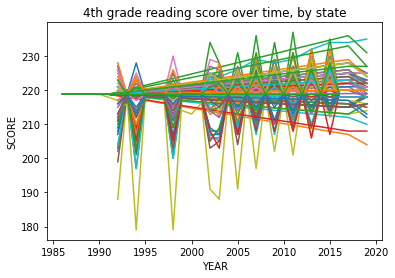

In [190]:
df.set_index('YEAR').groupby('STATE').AVG_READING_4_SCORE.plot()
plt.ylabel('SCORE')
plt.title('4th grade reading score over time, by state')

This graph describes how the reading scores for 4th graders have changed over time, split by state. From this we can see if scores are trending upwards or downwards with time.

**Visualization 2**

Text(0.5, 1.0, 'Total expenditure per 4th grade Student, by state')

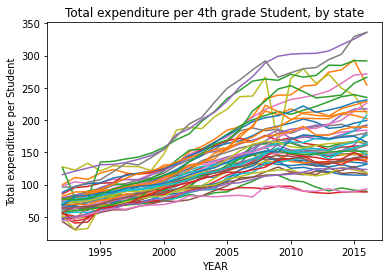

In [191]:
df.set_index('YEAR').groupby('STATE').TOTAL_PER_STUDENT.plot()
plt.ylabel('Total expenditure per Student')
plt.title('Total expenditure per 4th grade Student, by state')

In relation to the first graph we can see how states have changed their proportional spending per student with time, and we can relate that to how scores have changed


<h2> Data Creation </h2>

_Use this space to create train/test data_

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X = df[['TOTAL_REVENUE','ENROLL_4','TOTAL_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.30, random_state=0)
X_train = X_train.fillna(X_train.mean())

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION>**

In [195]:
# import your sklearn class here
import sklearn as skl
from sklearn.linear_model import LinearRegression


In [196]:
# create your model here
model = LinearRegression()

In [197]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'Total Expenditure per student')

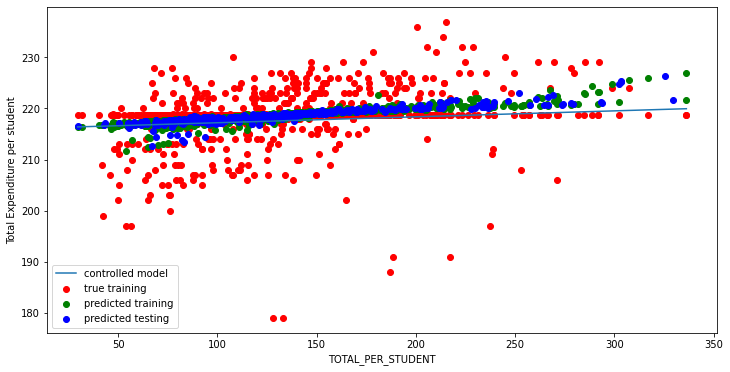

In [203]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "TOTAL_PER_STUDENT"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("Total Expenditure per student")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**
This was an excercise in conducting basic data analysis using important Python DS libraries. Through some data cleaning and visualization we can see that funding per students has risen dramatically around the end of the 2000s but later cooled off, which is interesting considering how the actual scores have changed with time. 